In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Load data and store it into pandas DataFrame objects
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']), index_col='PassengerId')
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']), index_col='PassengerId')
df_genderS = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']), index_col='PassengerId')

In [201]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [202]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [0]:
df_test2 = pd.concat([df_test, df_genderS['Survived']], axis=1)

df_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df_test2 = df_test2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

df = pd.concat([df_train, df_test2], axis=0)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Deletando instâncias que tenham valores faltando
df = df.dropna()

x = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [210]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier( splitter='best', max_depth=None, max_leaf_nodes=50 )
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [211]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
target_names = np.unique(y)
columns = df_train.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(x.columns))

from subprocess import call

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

0

In [212]:
predicted = tree.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, predicted)

0.8206106870229007

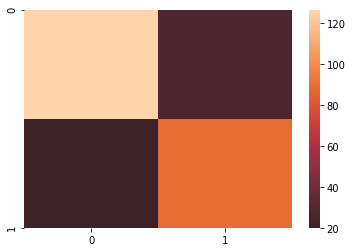

In [213]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [214]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,126,27
True Survival,20,89


In [215]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       153
           1       0.77      0.82      0.79       109

    accuracy                           0.82       262
   macro avg       0.82      0.82      0.82       262
weighted avg       0.82      0.82      0.82       262

